# Проект анализа оттока клиентов в банке «Метанпромбанк», Ярославская обл. 

# [презентация] https://disk.yandex.ru/i/24QR09tGYiLw_g

## Описание проекта

- Проект представляет собой анализ активности клиентов регионального банка «Метанпромбанк» с целью выделить сегменты клиентов, которые склонны уходить из банка, предложить мероприятия возврата ушедших и удержания склонных к уходу клиентов;
- Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.
- Ранее было проведено исследование оттока, составлены дэшборды и выделены сегменты, но клиентская база поменялась, и текущие решения не работают.
- Оттоком считается отсутствие транзакций клиента, неактивность в приложении более 90 дней.
- Для выполнения проекта имеется датасет с актуальными данными о клиентах банка:
    - USERID — идентификатор пользователя,
    - score — баллы кредитного скоринга,
    - city — город,
    - gender — пол,
    - age — возраст,
    - equity — количество баллов собственности,
    - balance — баланс на счёте,
    - products — количество продуктов, которыми пользуется клиент,
    - credit_card — есть ли кредитная карта,
    - last_activity — активный клиент,
    - EST_SALARY — оценочный доход клиента,
    - сhurn — признак оттока.

## Задачи проекта

- Чего мы хотим достичь и зачем:
    - выявить факторы оттока клиентов банка по имеющимся данным;
    - проверить несколько гипотез влияния известных показателей активности клиентов на вероятность их ухода:
        - проверить гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались 
        - в процессе исследовательского анализа определить наиболее существенные факторы оттока, сформулировать и проверить статистическую гипотезу относительно таких факторов, которая поможет внести ясность в исследование;
    - представить компактные однородные сегменты клиентов и дать примеры мероприятий, которые можно провести, чтобы вернуть клиентов в банк или удержать сомневающихся от оттока;
- Кто заинтересован в результате работы - отдела маркетинга банка;
- Формат результата проекта - презентация в формате PDF с основными выводами исследования, рекомендациями по мерам возврата ушедших клиентов и удержания сомневающихся клиентов;
- Какие решения будут предприняты на основании анализа - проведение мероприятий, чтобы вернуть клиентов в банк или удержать сомневающихся от оттока.

## Загрузка и предобработка данных

### Загрузка данных, общий обзор данных

In [1]:
# импортируем необходимые для проекта библиотеки
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
# Прочтём данные из файла: 
data = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv', sep=',')
data.info()
data.head()
display(data['age'].unique())
data['products'].unique()
data['products'].value_counts()
data = data.drop(data[data['products'] == 0].index)
data['products'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


array([25., 37., 30., 51., 34., 56., 39., 38., 54., 67., 52., 41., 31.,
       28., 35., 42., 45., 53., 40., 43., 47., 48., 61., 62., 36., 26.,
       27., 60., 72., 50., 46., 55., 58., 71., 44., 49., 33., 32., 66.,
       29., 68., 73., 69., 59., 21., 65., 57., 63., 80., 24., 70., 77.,
       64., 23., 20., 18., 19., 78., 74., 76., 22., 75., nan, 83., 82.,
       81., 84., 79., 86.])

products
2    5126
1    3341
3    1039
4     474
5      19
Name: count, dtype: int64

Выводы по загруженному сету данных о клиентах банка:

- в базе содержатся всего 10 000 записей с данными о клиентах с детализацией по 12 параметрам;
- имеются пропуски данных, которые нужно исследовать, в параметрах (столбцах) age, balance;
- тип данных столбца 'age' нужно преобразовать с текущего float64 на int64, т.к. возраст представлен целочисленными значениями;
- заголовки столбцов не имеют единый формат, имеются как строчные, так и прописные символы; загловки необходимо привести в единый стиль с нижним регистром и разделителями слов нижним подчеркиванием;
- выявлена запись с числом продуктов 0, она удалена, лицо, не имеющее продуктов не является клиентом банка. 

### Замена названия столбцов (привести к нижнему регистру)

In [3]:
# Заменим названия столбцов (приводим к нижнему регистру)
data.columns = data.columns.str.lower()
data = data.rename(columns= {'userid':'user_id'})
data.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


### Проверка и обработка дубликатов данных

#### Наличие явных дубликатов строк

In [4]:
# Проверим датасет на явные дубликаты строк
display('Количество дубликатов строк в датасете:', data.duplicated().sum())

'Количество дубликатов строк в датасете:'

0

- Явные дубликаты строк при проверке в дата сете не выявлены.

#### Неявные дубликаты по столбцу user_id

In [5]:
# Проверим данные на наличие неявных дубликатов по столбцу 'user_id'
display('Строки с дубликатами по user_id:')
dupl_user = data[data[['user_id']].duplicated(keep=False)].sort_values(by='user_id')
display(dupl_user)

display('Число дубликатов user_id:', dupl_user['user_id'].nunique())
# display('Число дубликатов user_id с г.Рыбинск:', dupl_user[dupl_user['user_id']].query('city == "Рыбинск" ').count())

display('Число дубликатов user_id по городам:', dupl_user['city'].value_counts())

# display('Дубликаты по "user_id", "gender", "age":', dupl_user[dupl_user[['user_id', 'gender', 'age']].duplicated(keep=False)])
# display(dupl_user.groupby('user_id')['city'].unique())

'Строки с дубликатами по user_id:'

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1893,116540,883.0,Рыбинск,Ж,55.0,1,362756.49,3,0,1,175920.48,1
7694,116540,887.0,Ярославль,Ж,38.0,0,NaN,1,0,1,119247.61,0
7542,117943,880.0,Ярославль,Ж,40.0,0,NaN,1,1,0,137718.93,0
4866,117943,855.0,Рыбинск,Ж,32.0,6,1036832.93,4,1,1,107792.71,1
5896,120258,905.0,Ярославль,М,30.0,0,NaN,1,1,1,146427.96,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2597,226719,990.0,Ярославль,М,37.0,4,14648692.14,2,0,0,934412.61,1
8205,227795,840.0,Рыбинск,М,34.0,2,350768.03,1,1,0,102036.14,1
8497,227795,839.0,Ярославль,М,34.0,2,326593.14,2,1,0,103314.92,0
6457,228075,839.0,Рыбинск,М,39.0,5,507199.85,3,0,1,85195.80,0


'Число дубликатов user_id:'

73

'Число дубликатов user_id по городам:'

city
Рыбинск      73
Ярославль    73
Name: count, dtype: int64

- Выявлено 146 строк в качестве дубликатов по столбцу 'user_id', которые содержат 73 уникальных user_id, то есть дубликаты user_id являются парными;
- Дубликаты user_id не встречаются в одних и тех же городах, они являются парными по городам Рыбинск и Ярославль; 
- Исходя из полученных данных дубли user_id являются либо одними и теми же пользователями, переехавшими из одного города в другой (либо имеющими счета в обоих городах), либо это разные пользователи с одинаковым user_id;
- С учетом того, что дубликаты user_id являются либо данными о клиентах, активных в двух филиалах банка, либо являются записями о разных клиентах, предлагается сохранить указанные дубликаты.

### Преобразование данных в нужные типы

In [6]:
# тип данных столбца 'age' нужно преобразовать с float64 на int64, т.к. возраст представлен целочисленными значениями
data['age'] = data['age'].astype('Int64')
data.info()
data['age'].unique()

<class 'pandas.core.frame.DataFrame'>
Index: 9999 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9999 non-null   int64  
 1   score          9999 non-null   float64
 2   city           9999 non-null   object 
 3   gender         9999 non-null   object 
 4   age            9973 non-null   Int64  
 5   equity         9999 non-null   int64  
 6   balance        7705 non-null   float64
 7   products       9999 non-null   int64  
 8   credit_card    9999 non-null   int64  
 9   last_activity  9999 non-null   int64  
 10  est_salary     9999 non-null   float64
 11  churn          9999 non-null   int64  
dtypes: Int64(1), float64(3), int64(6), object(2)
memory usage: 1.0+ MB


<IntegerArray>
[  25,   37,   30,   51,   34,   56,   39,   38,   54,   67,   52,   41,   31,
   28,   35,   42,   45,   53,   40,   43,   47,   48,   61,   62,   36,   26,
   27,   60,   72,   50,   46,   55,   58,   71,   44,   49,   33,   32,   66,
   29,   68,   73,   69,   59,   21,   65,   57,   63,   80,   24,   70,   77,
   64,   23,   20,   18,   19,   78,   74,   76,   22,   75, <NA>,   83,   82,
   81,   84,   79,   86]
Length: 69, dtype: Int64

### Проверка и обработка пропусков, анализ природы пропусков и их разумная обработка

In [7]:
# определим число пропусков по столбцам, а также долю пропусков в столбцах
for column in data:
    if (data[column].isna().sum() > 0):
        print('Количество пропусков в столбце', column, ':', data[column].isna().sum())

pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm')

Количество пропусков в столбце age : 26
Количество пропусков в столбце balance : 2294


,0
user_id,0.000000
score,0.000000
city,0.000000
gender,0.000000
age,0.300000
equity,0.000000
balance,22.900000
products,0.000000
credit_card,0.000000
last_activity,0.000000


In [8]:
# удалим пропуски в столбце age, доля этих пропусков является несущественной
data = data.dropna(subset=['age'])

- Пропуски данных имеются в столбцах age (26 или 0,3%) и balance (2295 или 23,0%). Пропуски в столбце age удалены, т.к. являются несущественными по доле в общем объеме данных.

In [9]:
# создадим признак по столбцу balance для пропусков (0) и для непустых ячеек (1) 
data.loc[data['balance'].isna(), 'balance_flag'] = 0
data.loc[data['balance'].notnull(), 'balance_flag'] = 1
data['balance_flag'] = data['balance_flag'].astype('Int64')

# по разрезу признака пропусков посчитаем меры центральной тенденции всех признаков датасета, а также их относительную разницу
data_balance = data.groupby('balance_flag')\
                    .agg({'score':'mean', 'age':'mean', 'equity':'median', 'products':'median', 
                          'credit_card':'median', 'last_activity':'median', 'est_salary':'mean', 'churn': 'median'})
data_balance['city'] = data.groupby('balance_flag')['city'].agg(pd.Series.mode)
data_balance['gender'] = data.groupby('balance_flag')['gender'].agg(pd.Series.mode)

list = ['score', 'age', 'equity', 'products', 'credit_card', 'last_activity', 'est_salary', 'churn']
data_balance.loc[2, list] = (data_balance.loc[1, list] - data_balance.loc[0, list]) / data_balance.loc[1, list] * 100

data_balance

,score,age,equity,products,credit_card,last_activity,est_salary,churn,city,gender
balance_flag,,,,,,,,,,
0,865.314750,42.076822,0.0,1.0,1.0,1.0,226433.776313,0.0,Ярославль,М
1,843.744120,42.924366,4.0,2.0,1.0,1.0,124520.394264,0.0,Ярославль,Ж
2,-2.556537,1.974507,100.0,50.0,0.0,0.0,-81.844731,NaN,NaN,NaN


<Axes: >

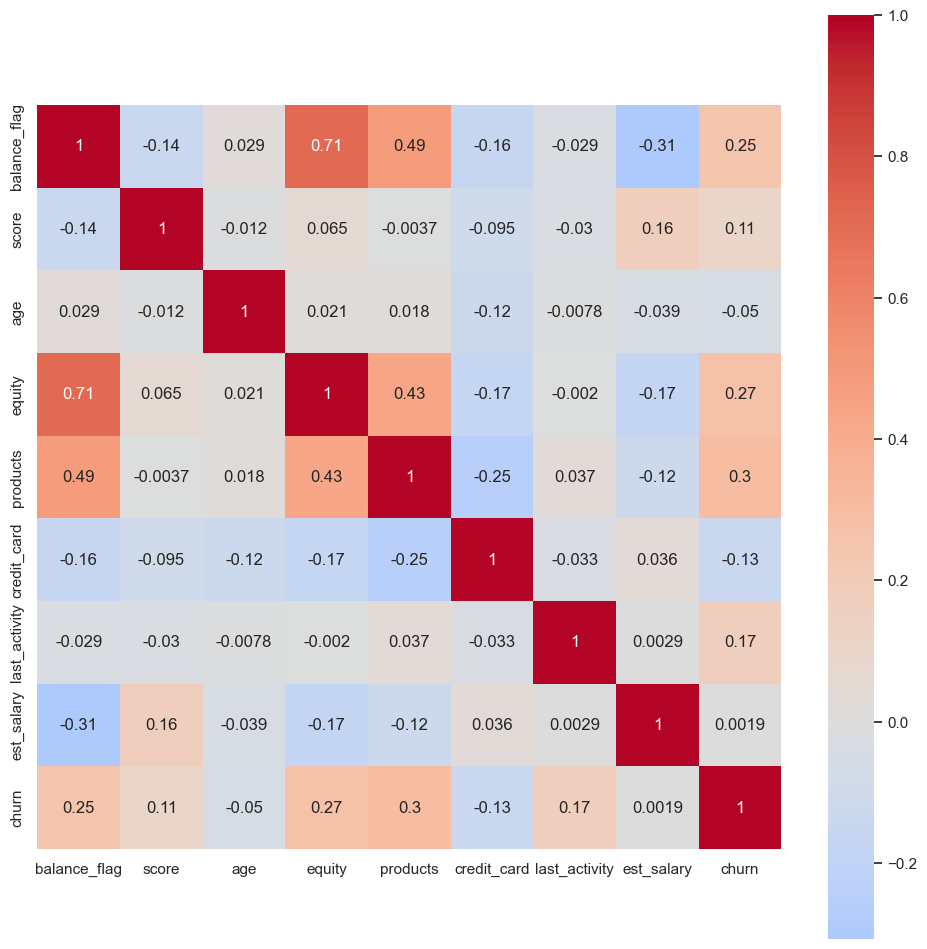

In [10]:
# посмотрим корреляцию признаков датасета с новым признаком для пропусков 
selected_columns = ['balance_flag', 'score', 'age', 'equity', 'products', 'credit_card', 'last_activity', 'est_salary', 'churn'] 
cm = data[selected_columns].corr()
sns.set(rc={"figure.figsize": (12, 12)})  
sns.heatmap(cm, annot=True, square=True, cmap='coolwarm', center=0) 

Согласно проведенному анализу пропуски столбца balance (признак balance_flag) существенно зависят от следующих факторов:
- equity - изменение медианы по признаку пропуска 100%, корреляция 0,71 (сильная связь по шкале Чеддока);
- products - изменение медианы по признаку пропуска 50%, корреляция 0,49 (слабая/средняя связь по шкале Чеддока).

In [11]:
# заполним пропуски столбца balance медианой значений balance по срезам пар products и equity как наиболее влияющих факторов 
# перебираем каждый тип products и equity в наборе уникальных значений
# на каждом шаге цикла с помощью атрибута loc выбираем строки с products, equity и пропусками в balance 
# и записываем в них медиану balance среди отобранных строк
for p in data['products'].unique():
    for e in data['equity'].unique():
        data.loc[(data['products'] == p) & (data['equity'] == e) & (data['balance'].isna()), 'balance'] = \
        data.loc[(data['products'] == p) & (data['equity'] == e), 'balance'].median()
    
# определим долю пропусков в столбцах
display('Доля пропусков в столбцах:')
pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm')

'Доля пропусков в столбцах:'

,0
user_id,0.000000
score,0.000000
city,0.000000
gender,0.000000
age,0.000000
equity,0.000000
balance,0.000000
products,0.000000
credit_card,0.000000
last_activity,0.000000


- Пропуски столбца balance заполнили медианой значений balance по срезам пар products и equity как наиболее влияющих факторов. 

### Кодирование категориальных значений для использования в анализе корреляции

In [12]:
# применим one-hot кодирование при помощи pandas.get_dummies() для категориальных переменных

data['gender_gd'] = data.loc[:, 'gender']
data['city_gd'] = data.loc[:, 'city']
data = pd.get_dummies(data, columns=['city_gd','gender_gd'])
data

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_flag,city_gd_Ростов,city_gd_Рыбинск,city_gd_Ярославль,gender_gd_Ж,gender_gd_М
0,183012,850.0,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,1,False,True,False,True,False
1,146556,861.0,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,1,False,True,False,True,False
2,120722,892.0,Рыбинск,Ж,30,0,127337.41,1,1,1,107683.34,0,0,False,True,False,True,False
3,225363,866.0,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,1,False,False,True,True,False
4,157978,730.0,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,1,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.0,Рыбинск,М,27,1,78144.65,1,0,1,18943.64,0,1,False,True,False,False,True
9996,139170,894.0,Ярославль,М,46,0,127337.41,1,1,0,196898.29,0,0,False,False,True,False,True
9997,115639,903.0,Ярославль,М,24,0,129005.68,2,1,1,108905.09,0,0,False,False,True,False,True
9998,148700,777.0,Ярославль,Ж,68,3,865457.97,3,0,1,86874.90,0,1,False,False,True,True,False


- В целях подготовки датасета к расчету корреляции всех признаков друг с другом применили one-hot кодирование методом pandas.get_dummies() для категориальных переменных city и gender.

**Выводы по разделу предобработки данных:**
- в базе содержатся всего 10 000 записей с данными о клиентах с детализацией по 12 параметрам
- в датасете заменены названия столбцов (приведены к нижнему регистру)
- явные дубликаты строк при проверке в датасете не выявлены
- выявлены неявные дубликаты:
    - 146 строк дубликатов по столбцу 'user_id', которые содержат 73 уникальных user_id, то есть дубликаты user_id являются парными;
    - дубликаты user_id не встречаются в одних и тех же городах, они являются парными по городам Рыбинск и Ярославль;
    - исходя из данных, дубли user_id являются либо одними и теми же пользователями, переехавшими из одного города в другой (либо имеющими счета в обоих городах), либо это разные пользователи с одинаковым user_id;
    - с учетом того, что дубликаты user_id являются либо данными о клиентах, активных в двух филиалах банка, либо являются записями о разных клиентах, предлагается сохранить указанные дубликаты;
- тип данных столбца 'age' преобразовали с float64 на int64, т.к. возраст представлен целочисленными значениями
- рассмотрели число абсолютных значений пропусков, а также долю пропусков в столбцах
    - доля выявленных пропусков в столбце age (26 или 0,3%) является несущественной, они удалены;
    - выявили, что пропуски столбца balance (2294 или 23%) существенно зависят от следующих факторов:
        - equity - изменение медианы по признаку пропуска 100%, корреляция 0,71 (сильная связь по шкале Чеддока);
        - products - изменение медианы по признаку пропуска 50%, корреляция 0,49 (слабая/средняя связь по шкале Чеддока).
        - таким образом пропуски столбца balance подпадают под правило обработки MNAR (Missing Not At Random / Отсутствует не случайно) - эти пропуски заполнили медианой значений balance по срезам пар products и equity как наиболее влияющих факторов;
- в целях подготовки датасета к расчету корреляции всех признаков друг с другом применили one-hot кодирование методом pandas.get_dummies() для категориальных переменных city и gender.

## Исследовательский анализ данных

### Распределения признаков активности клиентов в разрезе оттока, какие признаки и их значения связаны с повышенным оттоком

#### Характеристики распределений признаков активности клиентов

In [13]:
# выведем средние значения и стандартные отклонения признаков активности клиентов
data.describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_flag
count,9973.000000,9973.000000,9973.0,9973.000000,9.973000e+03,9973.000000,9973.000000,9973.000000,9.973000e+03,9973.000000,9973.0
mean,171757.616966,848.671212,42.730773,2.630803,6.684024e+05,1.871653,0.680237,0.522912,1.477991e+05,0.182292,0.771583
std,33696.365256,65.393153,12.175166,1.980060,1.763839e+06,0.792547,0.466408,0.499500,1.392871e+05,0.386105,0.419834
min,94561.000000,642.000000,18.0,0.000000,0.000000e+00,1.000000,0.000000,0.000000,2.546300e+03,0.000000,0.0
25%,142757.000000,802.000000,33.0,0.000000,1.290057e+05,1.000000,0.000000,0.000000,7.525202e+04,0.000000,1.0
50%,172651.000000,853.000000,40.0,3.000000,3.763121e+05,2.000000,1.000000,1.000000,1.196431e+05,0.000000,1.0
75%,201164.000000,900.000000,51.0,4.000000,8.044834e+05,2.000000,1.000000,1.000000,1.745000e+05,0.000000,1.0
max,229145.000000,1000.000000,86.0,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000,1.0


In [14]:
# рассмотрим средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался
# pd.options.display.max_columns = None
data.drop(['city','gender'], axis=1).groupby('churn').agg('mean')

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,balance_flag,city_gd_Ростов,city_gd_Рыбинск,city_gd_Ярославль,gender_gd_Ж,gender_gd_М
churn,,,,,,,,,,,,,,,
0,171928.110607,845.396199,43.020846,2.378296,5.659595e+05,1.758921,0.708890,0.482894,147674.637881,0.722134,0.141140,0.275414,0.583446,0.533047,0.466953
1,170992.833883,863.361936,41.429593,3.763476,1.127930e+06,2.377338,0.551705,0.702420,148357.483157,0.993399,0.145765,0.239824,0.614411,0.349285,0.650715


- Средние значения признаков по группам оттока (есть отток "1" и нет "0"):
    - несущественно различаются по признакам score, age, est_salary;
    - больше в группе оттока по признакам:
        - equity (3.76 к 2.38), 
        - balance (1128тыс.руб. к 566тыс.руб.), 
        - products (2.38 к 1.76),
        - last_activity (0.70 к 0.48),
        - мужчины к женщинам (0.65 к 0.35)
        - Ярославль к Рыбинску и Ростову (0.61 к 0.24 и 0.15)
    - меньше в группе оттока по признакам:
        - credit_card (0.55 к 0.70)

### Распределения непрерывных признаков активности клиентов в разрезе оттока

#### Кредитный рейтинг (score)

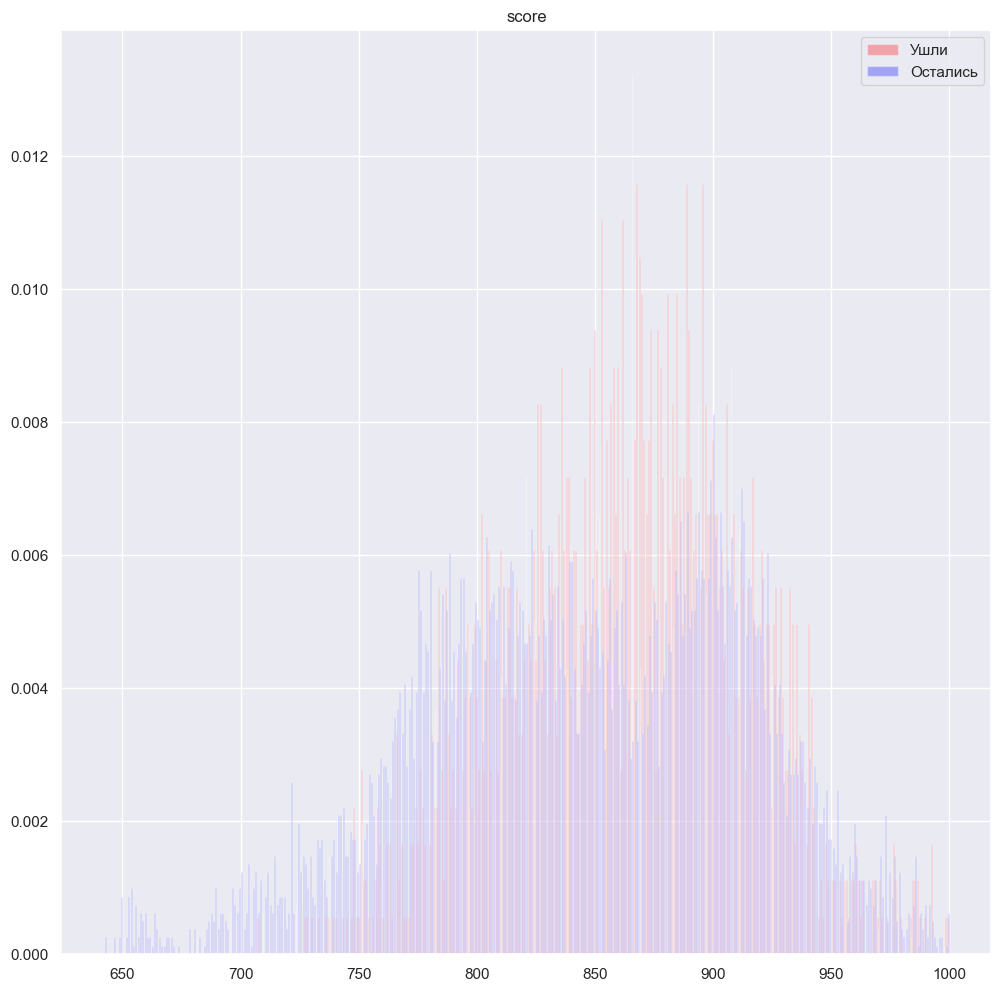

In [15]:
# выведем распределение признака score в разрезе оттока и лояльности 
plt.hist(
        [data.query('churn == 1')['score'], data.query('churn == 0')['score']], 
         density=True, bins=359, label=['Ушли', 'Остались'], color=('red', 'blue'), alpha=0.3
        )
plt.title('score')
plt.legend()
plt.show()    

 - Интервалы признака score, где отток выше, чем лояльность: 825-900 баллов.

#### Возраст (age)

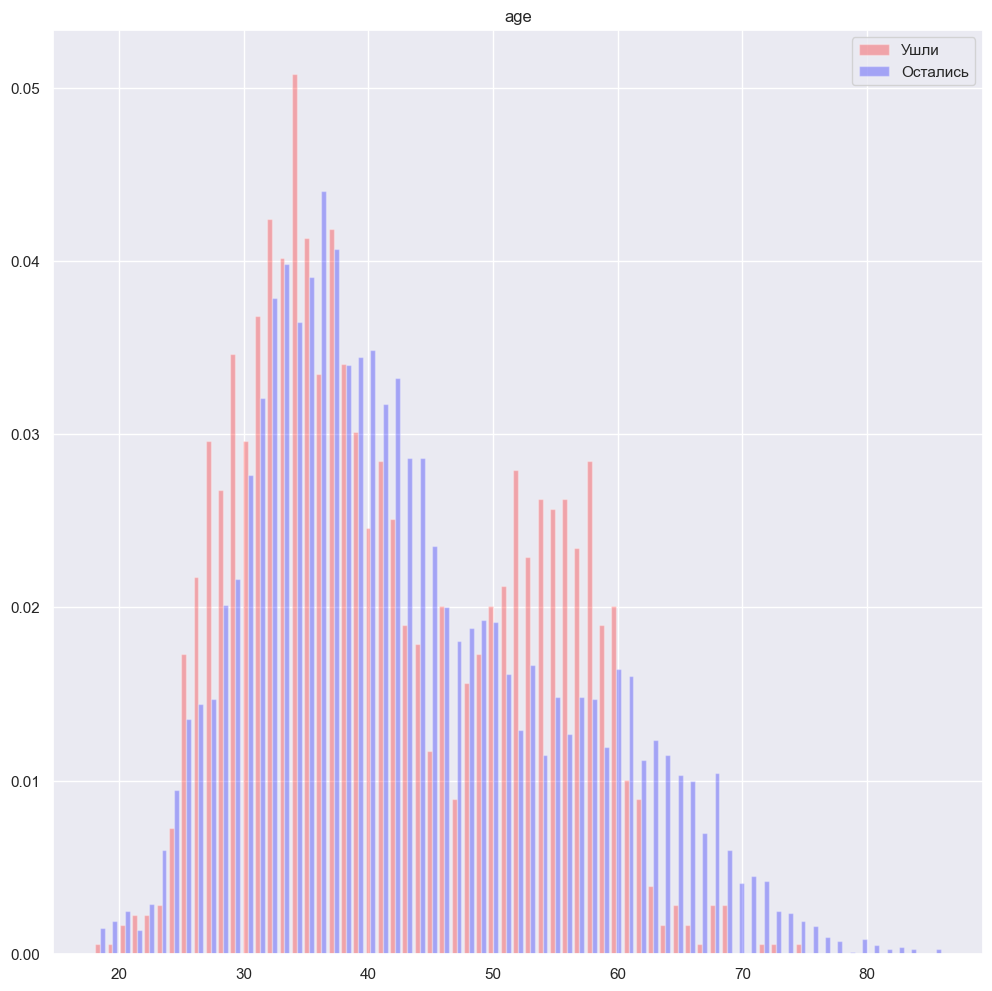

In [16]:
# выведем распределение признака age в разрезе оттока и лояльности 
plt.hist(
        [data.query('churn == 1')['age'], data.query('churn == 0')['age']], 
         density=True, bins=69, label=['Ушли', 'Остались'], color=('red', 'blue'), alpha=0.3
        )
plt.title('age')
plt.legend()
plt.show()    

- Интервалы признака age, где отток выше лояльности: 25-35 и 50-60 лет. 

#### Остаток по счету (balance)

count    9.973000e+03
mean     6.684024e+05
std      1.763839e+06
min      0.000000e+00
25%      1.290057e+05
50%      3.763121e+05
75%      8.044834e+05
max      1.191136e+08
Name: balance, dtype: float64

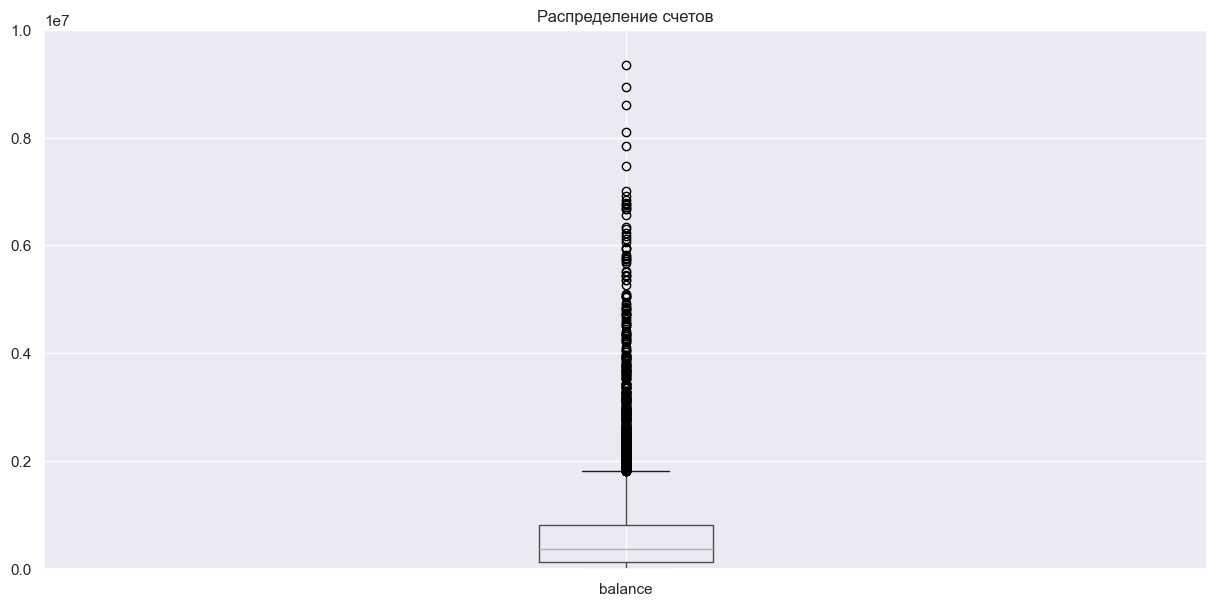

In [17]:
# рассмотрим диапазоны значений данных balance
data.boxplot(column='balance', figsize=(15, 7)).set_title("Распределение счетов")
plt.ylim(-0.50, 10000000)
data['balance'].describe()

- У распределения счетов клиентов есть выбросы данных за пределами 1,5 межквартильного размаха. Высокая плотность выбросов в диапазоне 2-7 млн.руб. и есть отдельные выбросы в диапазоне 7-119 млн.руб. Распределение признака balance в разрезе оттока и лояльности рассмотрим в биапазоне наибольшей плотности данных от 0 до 5 млн.руб.

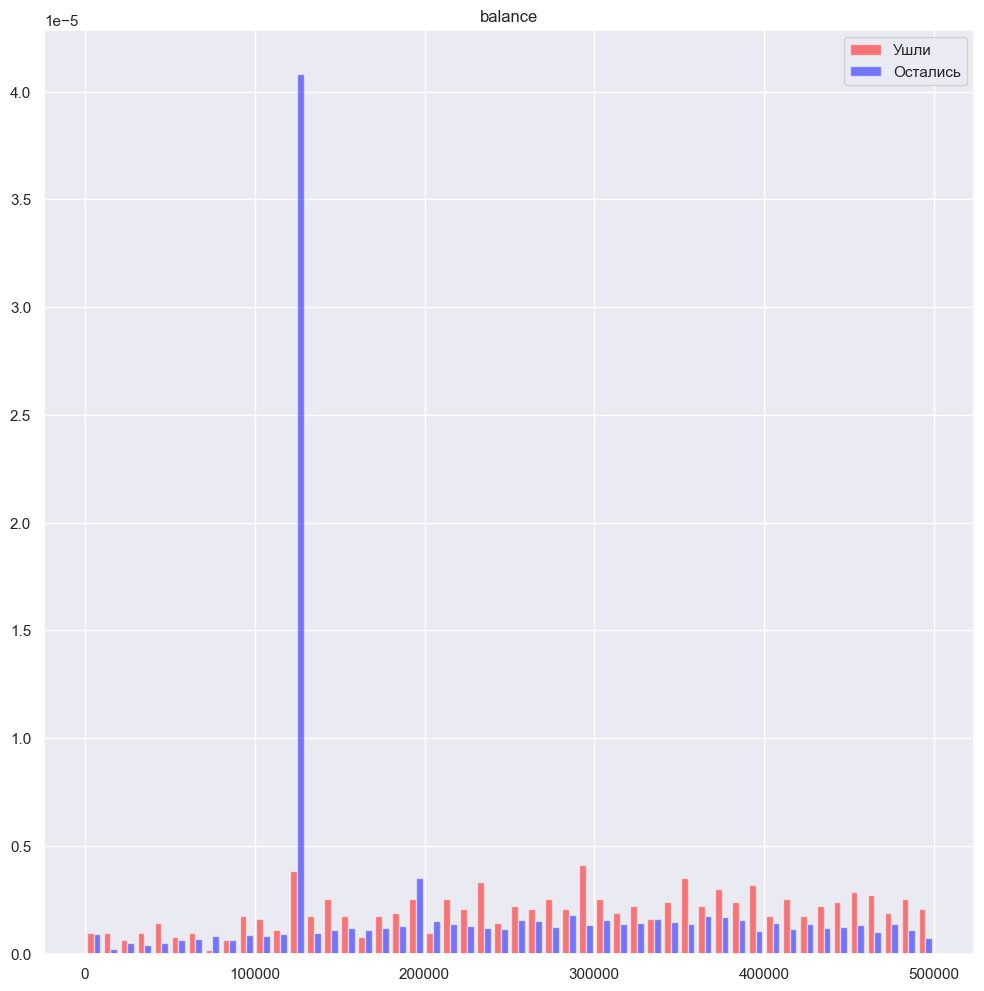

In [18]:
# выведем распределение признака balance в диапазоне 0-0,5млн.руб. в разрезе оттока и лояльности 

plt.hist(
        [data.query('churn == 1')['balance'], data.query('churn == 0')['balance']], 
         range = (0, 500000), density=True, bins=50, label=['Ушли', 'Остались'], color=('red', 'blue'), alpha=0.5
        )
plt.title('balance')
plt.legend()
plt.show()    

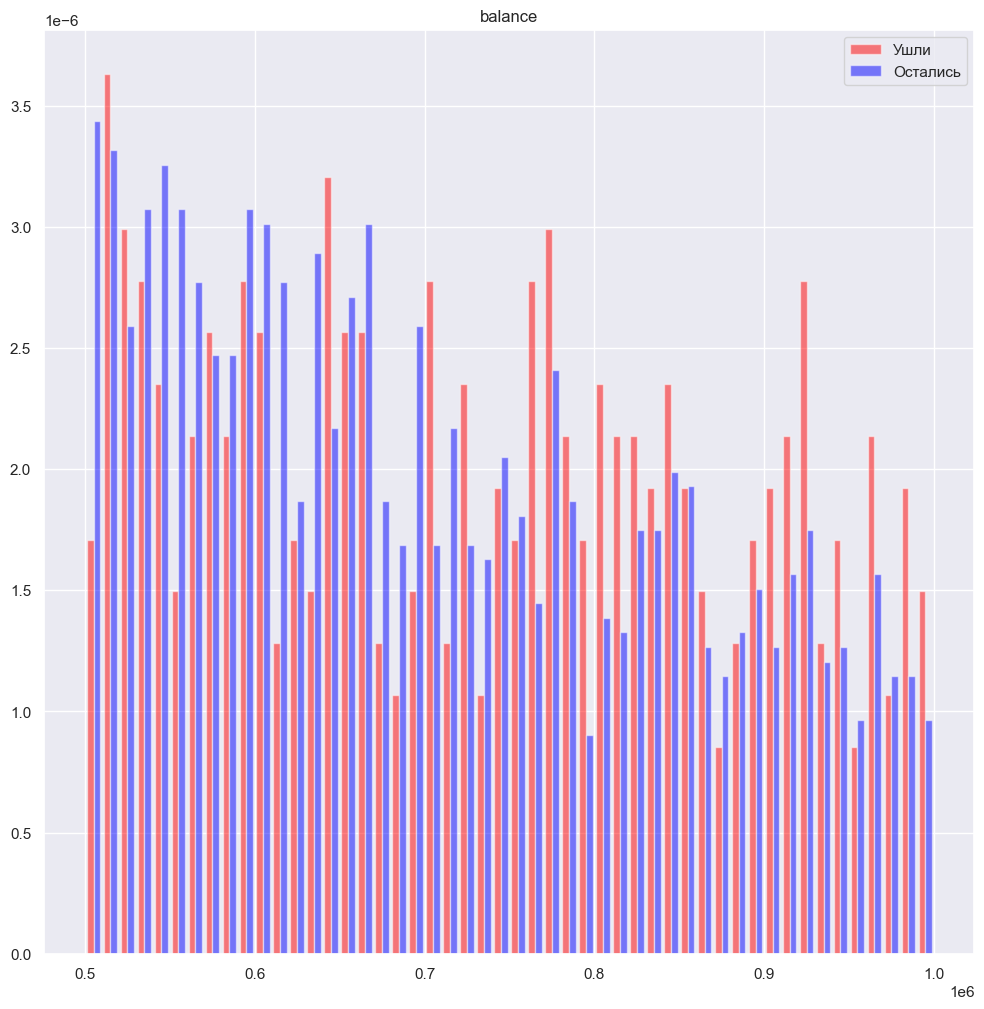

In [19]:
# выведем распределение признака balance в диапазоне 0,5-1,0 млн.руб. в разрезе оттока и лояльности

plt.hist(
        [data.query('churn == 1')['balance'], data.query('churn == 0')['balance']], 
         range = (500000, 1000000), density=True, bins=50, label=['Ушли', 'Остались'], color=('red', 'blue'), alpha=0.5
        )
plt.title('balance')
plt.legend()
plt.show()    

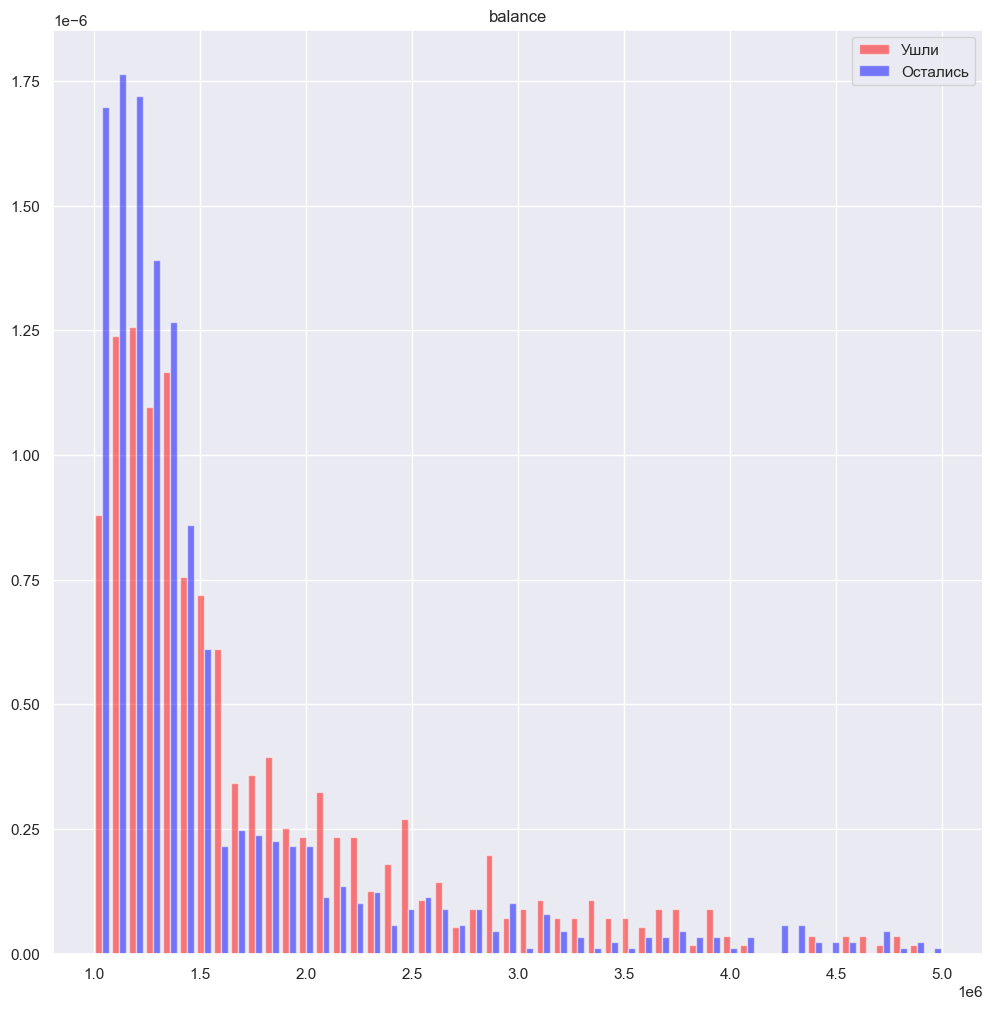

In [20]:
# выведем распределение признака balance в диапазоне 1-5 млн.руб. в разрезе оттока и лояльности
plt.hist(
        [data.query('churn == 1')['balance'], data.query('churn == 0')['balance']], 
         range = (1000000, 5000000), density=True, bins=50, label=['Ушли', 'Остались'], color=('red', 'blue'), alpha=0.5
        )
plt.title('balance')
plt.legend()
plt.show()    

- Интервалы признака balance, где отток выше лояльности: 0.25-0.50,  0.75-1.0 и 1.5-4.0 млн.руб. 

#### Средняя зарплата (est_salary)

count    9.973000e+03
mean     1.477991e+05
std      1.392871e+05
min      2.546300e+03
25%      7.525202e+04
50%      1.196431e+05
75%      1.745000e+05
max      1.395064e+06
Name: est_salary, dtype: float64

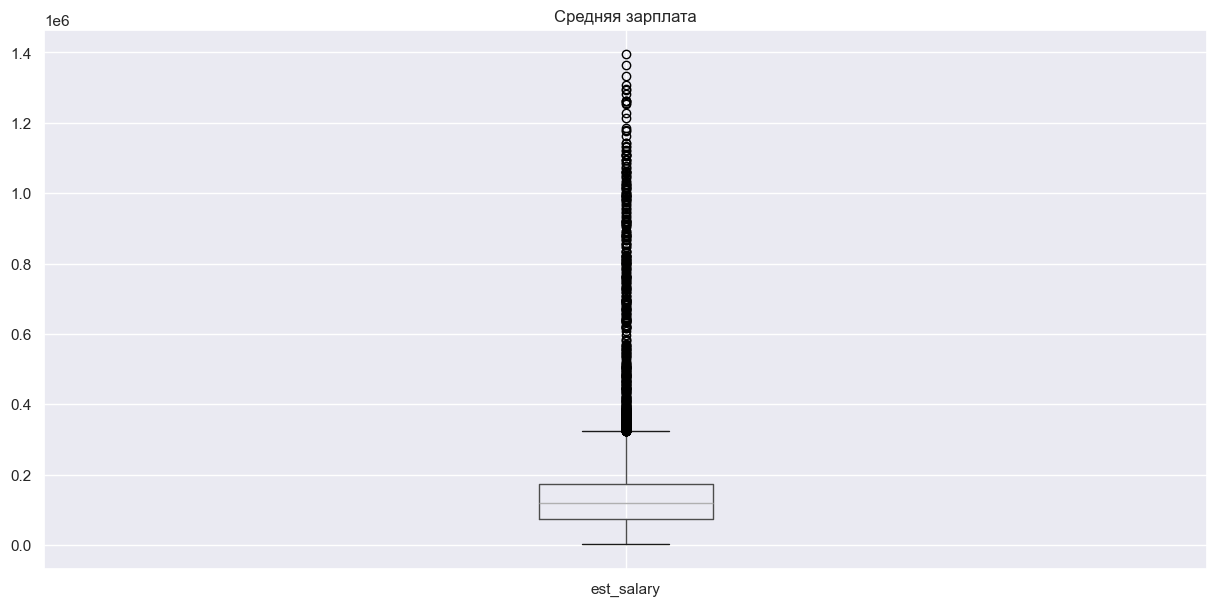

In [21]:
# рассмотрим диапазоны значений данных est_salary
data.boxplot(column='est_salary', figsize=(15, 7)).set_title("Средняя зарплата")
#plt.ylim(-0.50, 1000000)
data['est_salary'].describe()

- У распределения зарплат клиентов есть выбросы данных за пределами 1,5 межквартильного размаха. Высокая плотность выбросов в диапазоне 0.3-1.1 млн.руб. и есть отдельные выбросы в диапазоне 1.1-1.4 млн.руб. Распределение признака est_salary в разрезе оттока и лояльности рассмотрим в биапазоне наибольшей плотности данных от 0 до 0.4 млн.руб.

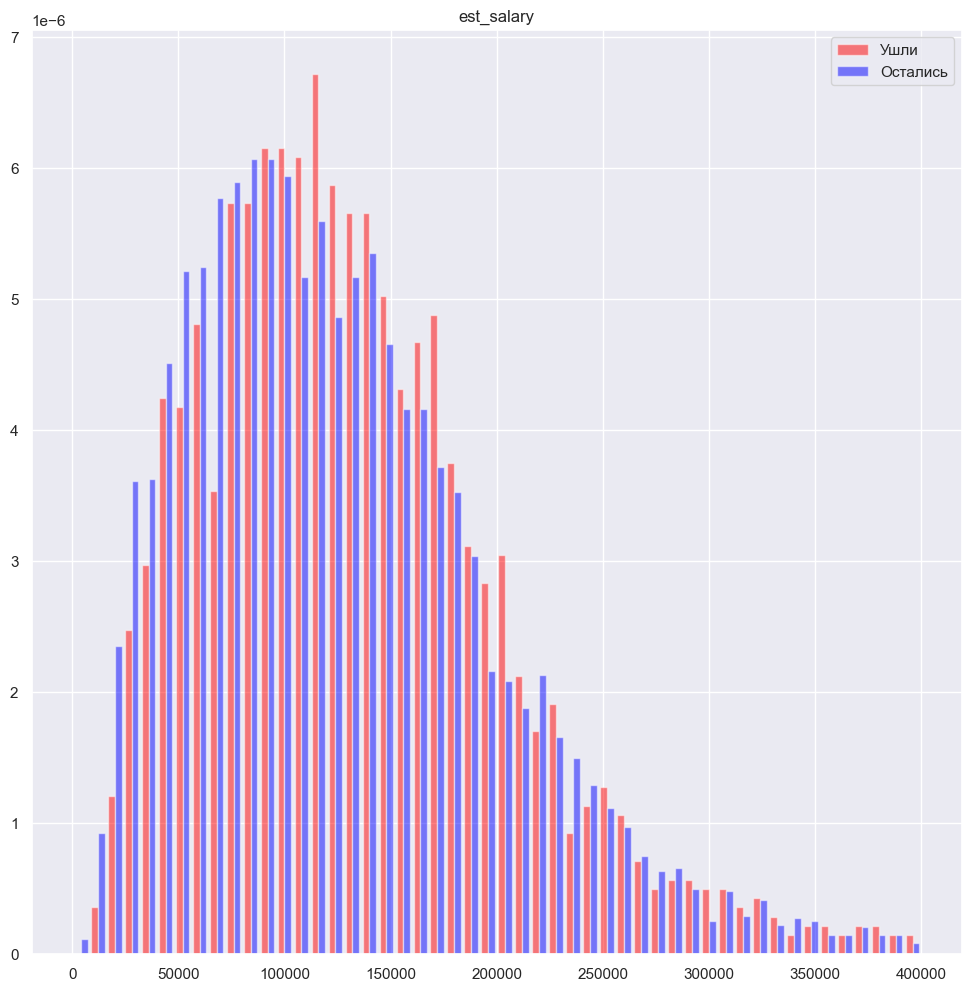

In [22]:
# выведем распределение признака est_salary в разрезе оттока и лояльности от 0 до 0.4 млн.руб.
plt.hist(
        [data.query('churn == 1')['est_salary'], data.query('churn == 0')['est_salary']], 
         range = (0, 400000), density=True, bins=50, label=['Ушли', 'Остались'], color=('red', 'blue'), alpha=0.5
        )
plt.title('est_salary')
plt.legend()
plt.show()    

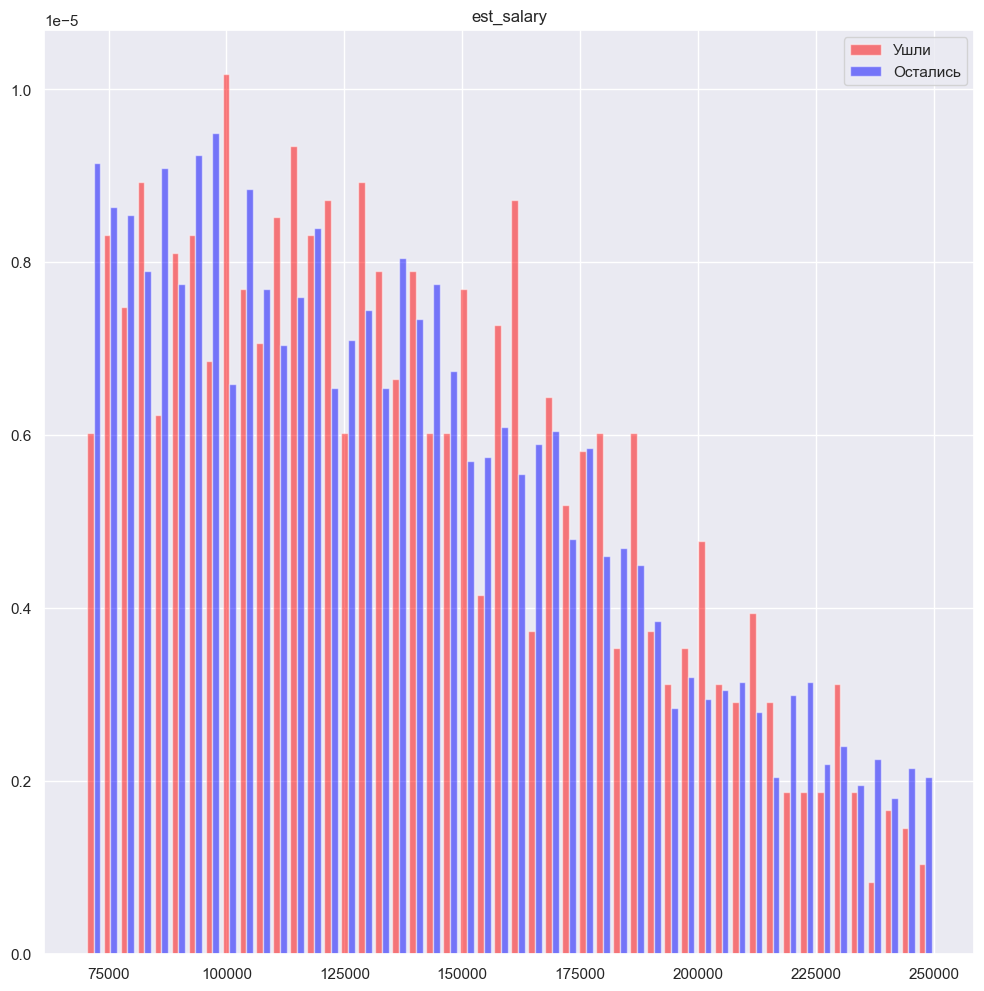

In [23]:
# выведем распределение признака est_salary в разрезе оттока и лояльности от 70 до 250 тыс.руб., т.к. здесь отток выше
plt.hist(
        [data.query('churn == 1')['est_salary'], data.query('churn == 0')['est_salary']], 
         range = (70000, 250000), density=True, bins=50, label=['Ушли', 'Остались'], color=('red', 'blue'), alpha=0.5
        )
plt.title('est_salary')
plt.legend()
plt.show()    

- Интервалы признака est_salary, где отток выше лояльности: 100 - 215 тыс.руб. 

### Распределения категориальных/дискретных признаков активности клиентов в разрезе оттока

#### Число объектов собственности (equity)

In [24]:
# рассмотрим средний уровень оттока клиентов по числу объектов собственности 

churn_mean = data['churn'].mean()

equity_churn = pd.pivot_table(data, index="equity", values='churn', aggfunc='mean')
equity_churn = equity_churn.sort_values(by='equity') 
equity_churn = equity_churn.reset_index()
display(equity_churn)

,equity,churn
0,0,0.034938
1,1,0.120310
2,2,0.157945
3,3,0.208442
4,4,0.251218
5,5,0.300783
6,6,0.360248
7,7,0.462500
8,8,0.352941
9,9,0.538462


Text(0, 0.5, 'Число объектов собственности')

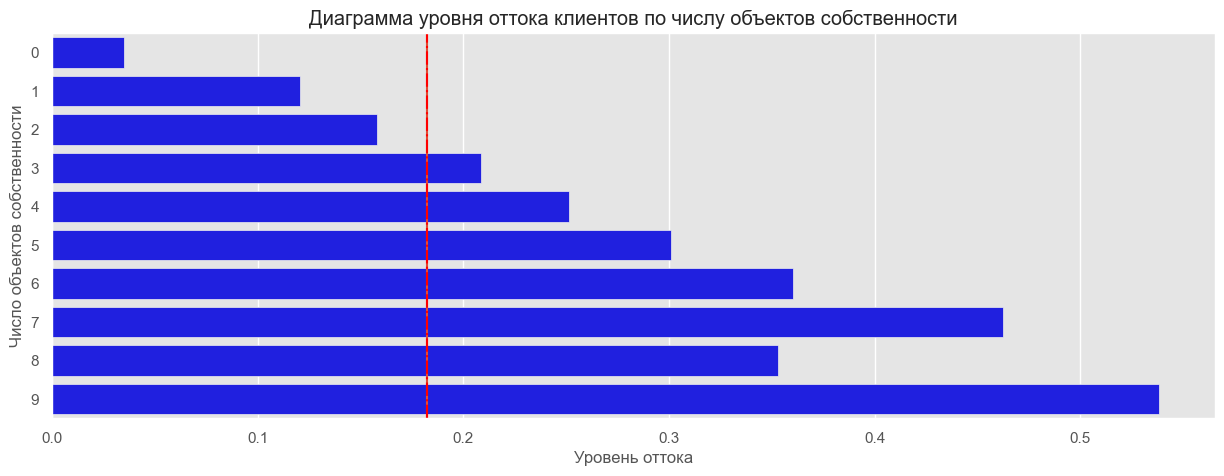

In [25]:
# выведем диаграмму уровня оттока клиентов по числу объектов собственности в сравнении со средним оттоком по банку

plt.figure(figsize=(15,5))
plt.style.use('ggplot')
ax = sns.barplot(x="churn", y="equity", data=equity_churn, color='blue', orient = 'h')
ax.axvline(churn_mean)
ax.set_title('Диаграмма уровня оттока клиентов по числу объектов собственности') 
plt.axvline(x=churn_mean, color='red', linestyle='dashdot')
plt.xlabel('Уровень оттока')
plt.ylabel('Число объектов собственности')


- Клиенты с числом объектов собственности 3 и выше более склонны к оттоку

#### Филиалы банка (city)

In [26]:
# рассмотрим средний уровень оттока клиентов по городам филиалов банка 

city_churn = pd.pivot_table(data, index='city', values='churn', aggfunc='mean')
city_churn = city_churn.sort_values(by='churn')
city_churn = city_churn.reset_index()
display(city_churn)

,city,churn
0,Рыбинск,0.162565
1,Ростов,0.187147
2,Ярославль,0.190128


Text(0, 0.5, 'Города филиалы банка')

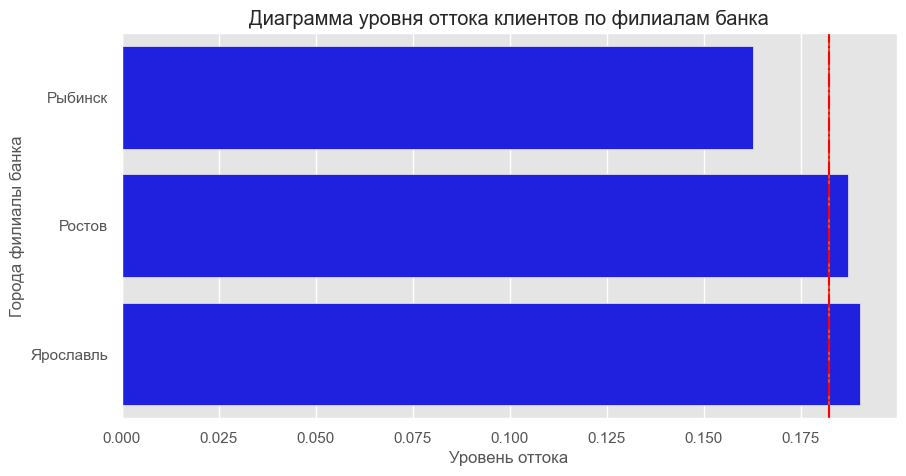

In [27]:
# выведем диаграмму уровня оттока клиентов по городам филиалов банка в сравнении со средним оттоком по банку

plt.figure(figsize=(10,5))
plt.style.use('ggplot')
ax = sns.barplot(x="churn", y="city", data=city_churn, color='blue', orient = 'h')
ax.axvline(churn_mean)
ax.set_title('Диаграмма уровня оттока клиентов по филиалам банка') 
plt.axvline(x=churn_mean, color='red', linestyle='dashdot')
plt.xlabel('Уровень оттока')
plt.ylabel('Города филиалы банка')

- Клиенты городов Ростов и Ярославль более склонны к оттоку

#### Пол клиентов

In [28]:
# рассмотрим средний уровень оттока клиентов по полу 

gender_churn = pd.pivot_table(data, index="gender", values='churn', aggfunc='mean')
gender_churn = gender_churn.sort_values(by='gender') 
gender_churn = gender_churn.reset_index()
display(gender_churn)

,gender,churn
0,Ж,0.127459
1,М,0.237027


Text(0, 0.5, 'Пол клиентов')

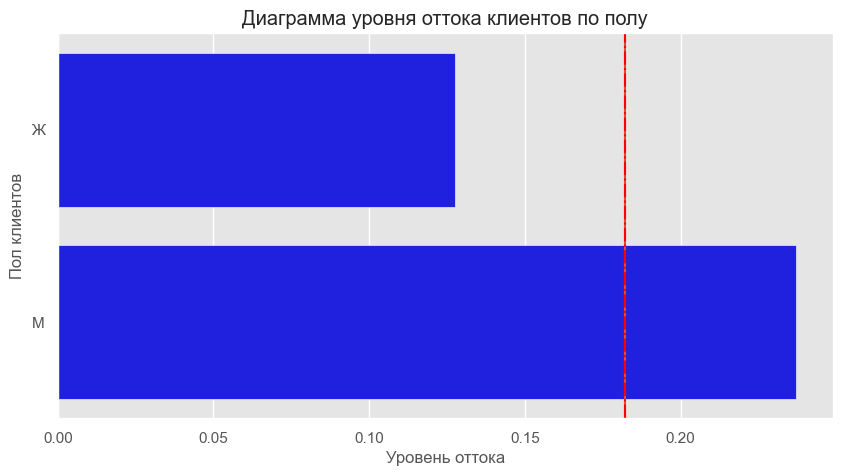

In [29]:
# выведем диаграмму уровня оттока клиентов по полу в сравнении со средним оттоком по банку

plt.figure(figsize=(10,5))
plt.style.use('ggplot')
ax = sns.barplot(x="churn", y="gender", data=gender_churn, color='blue', orient = 'h')
ax.axvline(churn_mean)
ax.set_title('Диаграмма уровня оттока клиентов по полу') 
plt.axvline(x=churn_mean, color='red', linestyle='dashdot')
plt.xlabel('Уровень оттока')
plt.ylabel('Пол клиентов')

- Клиенты мужчины более склонны к оттоку.

#### Число продуктов (products)

In [30]:
# рассмотрим средний уровень оттока клиентов по числу продуктов

products_churn = pd.pivot_table(data, index="products", values='churn', aggfunc='mean')
products_churn = products_churn.sort_values(by='products') 
products_churn = products_churn.reset_index()
display(products_churn)

,products,churn
0,1,0.070719
1,2,0.191053
2,3,0.286127
3,4,0.632911
4,5,0.421053


Text(0, 0.5, 'Число продуктов')

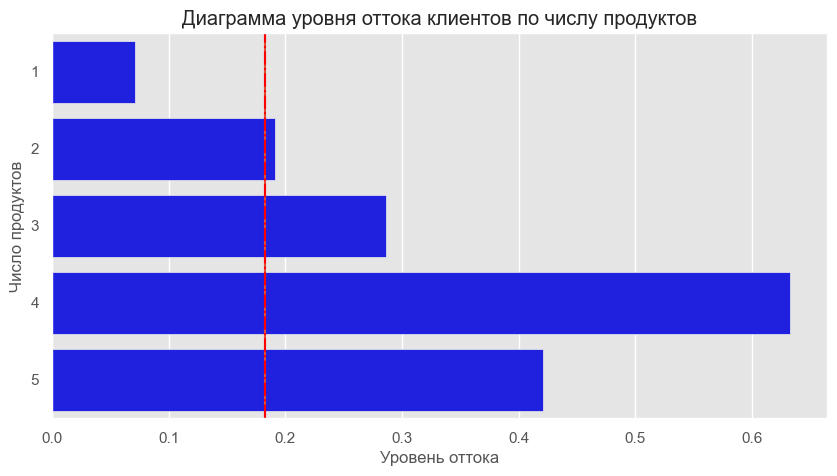

In [31]:
# выведем диаграмму уровня оттока клиентов по числу продуктов в сравнении со средним оттоком по банку

plt.figure(figsize=(10,5))
plt.style.use('ggplot')
ax = sns.barplot(x="churn", y="products", data=products_churn, color='blue', orient = 'h')
ax.axvline(churn_mean)
ax.set_title('Диаграмма уровня оттока клиентов по числу продуктов') 
plt.axvline(x=churn_mean, color='red', linestyle='dashdot')
plt.xlabel('Уровень оттока')
plt.ylabel('Число продуктов')

- Клиенты с числом продуктов от 3х более склонны к оттоку.

#### Наличие кредитной карты

In [32]:
# рассмотрим средний уровень оттока клиентов по наличию кредитной карты

credit_churn = pd.pivot_table(data, index="credit_card", values='churn', aggfunc='mean')
credit_churn = credit_churn.sort_values(by='churn') 
credit_churn = credit_churn.reset_index()
display(credit_churn)

,credit_card,churn
0,1,0.147848
1,0,0.255566


Text(0, 0.5, 'Наличие кредитной карты')

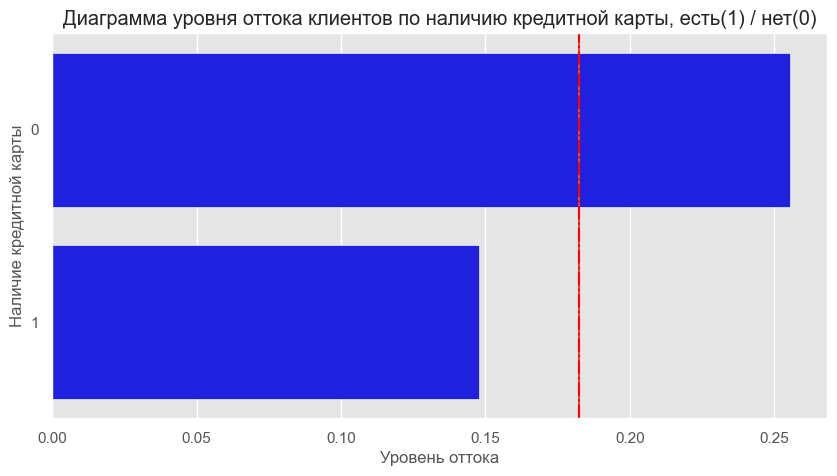

In [33]:
# выведем диаграмму уровня оттока клиентов по наличию кредитной карты в сравнении со средним оттоком по банку

plt.figure(figsize=(10,5))
plt.style.use('ggplot')
ax = sns.barplot(x="churn", y="credit_card", data=credit_churn, color='blue', orient = 'h')
ax.axvline(churn_mean)
ax.set_title('Диаграмма уровня оттока клиентов по наличию кредитной карты, есть(1) / нет(0)') 
plt.axvline(x=churn_mean, color='red', linestyle='dashdot')
plt.xlabel('Уровень оттока')
plt.ylabel('Наличие кредитной карты')

- Клиенты без кредитной карты более склонны к оттоку

#### Статус активности (last_activity)

In [34]:
# рассмотрим средний уровень оттока клиентов по статусу активности

active_churn = pd.pivot_table(data, index="last_activity", values='churn', aggfunc='mean')
active_churn = active_churn.sort_values(by='churn') 
active_churn = active_churn.reset_index()
display(active_churn)

,last_activity,churn
0,0,0.113703
1,1,0.244871


Text(0, 0.5, 'Активность клиентов')

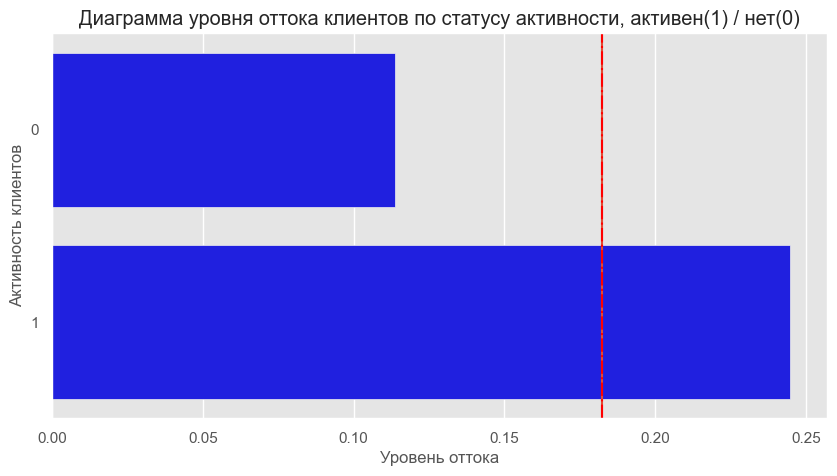

In [35]:
# выведем диаграмму уровня оттока клиентов по активности в сравнении со средним оттоком по банку

plt.figure(figsize=(10,5))
plt.style.use('ggplot')
ax = sns.barplot(x="churn", y="last_activity", data=active_churn, color='blue', orient = 'h')
ax.axvline(churn_mean)
ax.set_title('Диаграмма уровня оттока клиентов по статусу активности, активен(1) / нет(0)') 
plt.axvline(x=churn_mean, color='red', linestyle='dashdot')
plt.xlabel('Уровень оттока')
plt.ylabel('Активность клиентов')

- Данные показывают, что активные клиенты более склонны к оттоку; вывод противоречит логике, возможно в данных ошибка кодирования и неактивные клиенты не попали в отток ошибочно; кодировку оттока по активности клиентов рекомендуется проверить.

### Корреляция показателей активности, тепловая карта

<Axes: >

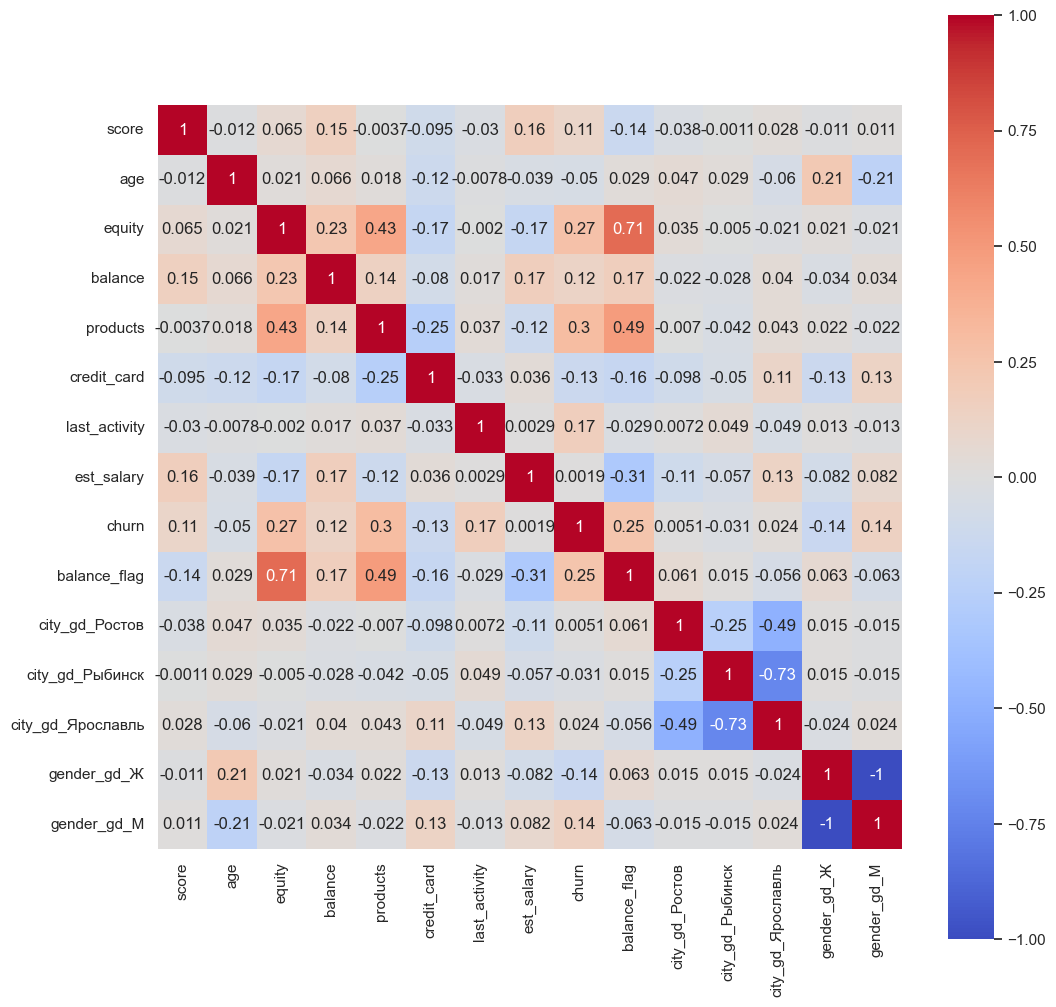

In [36]:
# посмотрим корреляцию всех признаков таблицы - попарно между всеми признаками, с фокусом на признак оттока
cm_1 = data.drop(['user_id','city','gender'], axis=1).corr()
sns.set(rc={"figure.figsize": (12, 12)})  
sns.heatmap(cm_1, annot=True, square=True, cmap='coolwarm', center=0) 

Согласно матрице корреляции признаков, признак оттока имеет следующую корреляцию по признакам клиентов (коэффициенты Пирсона и уровень влияния по шкале Чеддока):
- кредитный рейтинг (score): 0.11 - очень слабая связь;
- счета клиентов (balance): 0.12 - очень слабая связь;
- наличие кредитной карты (credit_card): -0.13 - очень слабая связь (по отсутствию карты);
- пол клиентов (gender): 0.14 - очень слабая связь;
- число объектов собственности (equity): 0.27 - очень слабая/слабая связь;
- число продуктов (products): 0.3 - слабая связь;

### Портреты типичных клиентов, которые склонны и не склонны уходить из банка

In [37]:
# создадим признак по столбцу balance для пропусков (0) и для непустых ячеек (1) 
# data.loc[data['balance'].isna(), 'balance_flag'] = 0
# data.loc[data['balance'].notnull(), 'balance_flag'] = 1
# data['balance_flag'] = data['balance_flag'].astype('Int64')

# по разрезу признака оттока посчитаем меры центральной тенденции всех признаков датасета, а также их относительную разницу
data_churn = data.groupby('churn')\
                    .agg({'score':'mean', 'age':'mean', 'equity':'median', 'balance':{'mean','median'}, 
                          'products':'median', 'credit_card':'median', 'last_activity':'median', 
                          'est_salary':{'mean','median'}})
data_churn['city'] = data.groupby('churn')['city'].agg(pd.Series.mode)
data_churn['gender'] = data.groupby('churn')['gender'].agg(pd.Series.mode)

list = ['score', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary']
data_churn.loc[2, list] = (data_churn.loc[1, list] - data_churn.loc[0, list]) / data_churn.loc[1, list] * 100

data_churn

score        age equity       balance                products  \
             mean       mean median          mean         median   median   
churn                                                                       
0      845.396199  43.020846    3.0  5.659595e+05  321642.560000      2.0   
1      863.361936  41.429593    4.0  1.127930e+06  775399.470000      2.0   
2        2.080905  -3.840861   25.0  4.982319e+01      58.519115      0.0   

      credit_card last_activity     est_salary                      city  \
           median        median           mean         median              
churn                                                                      
0             1.0           0.0  147674.637881  118227.600000  Ярославль   
1             1.0           1.0  148357.483157  125408.880000  Ярославль   
2             0.0         100.0       0.460270       5.726293        NaN   

      gender  
              
churn         
0          Ж  
1          М  
2        NaN

Согласно расчету мер центральной тенденции, для признака оттока есть изменения мер центральной тенденции (в % изменения мер):
- кредитный рейтинг (score): 2%;
- счета клиентов (balance): 50%;
- число объектов собственности (equity): 25%.

## Формулирование и проверка статистических гипотез

### Проверить гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались

count    1.818000e+03
mean     1.483575e+05
std      1.229320e+05
min      1.088027e+04
25%      8.328566e+04
50%      1.254089e+05
75%      1.760178e+05
max      1.263028e+06
Name: est_salary, dtype: float64

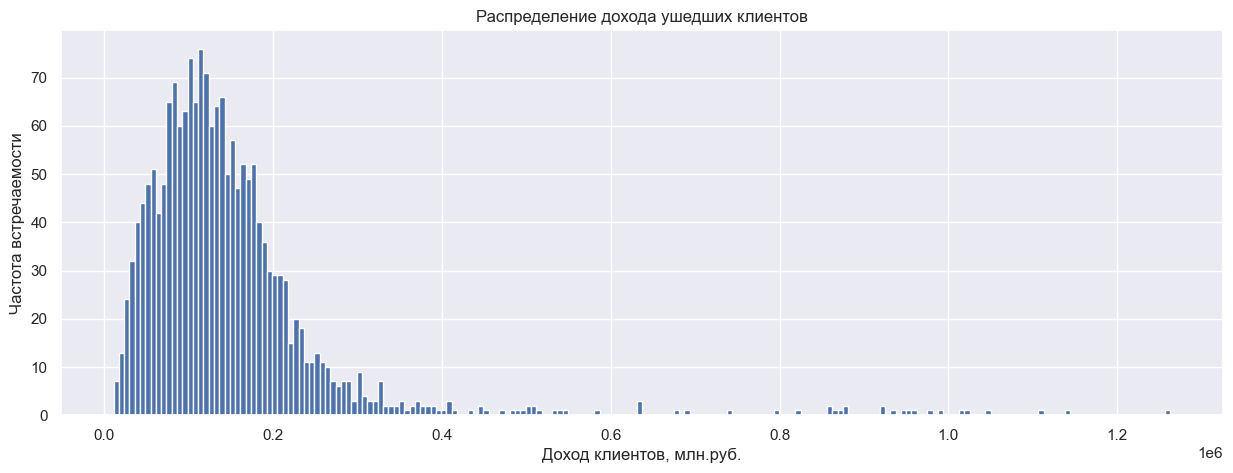

In [38]:
# Выведем характеристики распределения дохода ушедших клиентов

salary_churn = data.query("churn == 1")['est_salary']
display(salary_churn.describe())
ax=salary_churn.hist(bins=200, grid=True, figsize=(15, 5))
ax.set_xlabel('Доход клиентов, млн.руб.')
ax.set_ylabel('Частота встречаемости')
ax.set_title('Распределение дохода ушедших клиентов')
plt.show()

count    8.155000e+03
mean     1.476746e+05
std      1.426844e+05
min      2.546300e+03
25%      7.344555e+04
50%      1.182276e+05
75%      1.739609e+05
max      1.395064e+06
Name: est_salary, dtype: float64

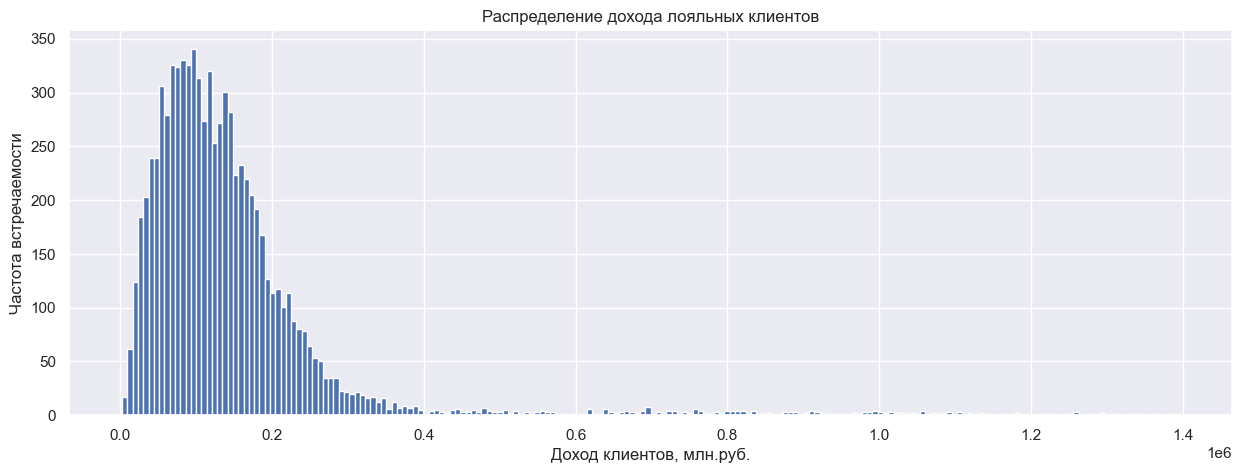

In [39]:
# Выведем характеристики распределения дохода лояльных клиентов

salary_loyal = data.query("churn == 0")['est_salary']
display(salary_loyal.describe())
ax=salary_loyal.hist(bins=200, grid=True, figsize=(15, 5))
ax.set_xlabel('Доход клиентов, млн.руб.')
ax.set_ylabel('Частота встречаемости')
ax.set_title('Распределение дохода лояльных клиентов')
plt.show()

**Обоснование метода проверки гипотезы**

При проверке гипотез ttest более интерпретируемый и понятный для бизнеса, поэтому рассмотрим возможность его применения к полученным выборкам.

Выборки ушедших и лояльных клиентов составили 1818 и 8155.

Чтобы понять, можно ли применять t-тест, нужно проверить:
- Выборочные средние нормально распределены. Это условие не должно быть препятствием благодаря ЦПТ. Если размер выборки составляет хотя бы несколько десятков значений, то выборочные средние, которые можно получить из одной и той же генеральной совокупности, будут распределены близко к нормальному вокруг истинного среднего этой совокупности. В нашем случае условие выполняется.
- Дисперсии рассматриваемых генеральных совокупностей равны. В нашем случае нет оснований думать, что дисперсии генеральных совокупностей существенно различаются: отклонения выборок составили 123 тыс.руб. и 143 тыс.руб., различие 14%.

Для проверки гипотезы проведем двухвыборочный двухсторонний t-тест для независимых выборок. Сформулируем нулевую (Н0) и альтернативную (Н1) гипотезы:

- Н0 - средний доход ушедших и лояльных клиентов равны
- Н1 - средний доход ушедших и лояльных клиентов не равны

In [40]:
# проведем проверку гипотезы

#Уровень статистической значимости
alpha = 0.05

results = st.ttest_ind(
                       salary_churn, 
                       salary_loyal, 
                       alternative = 'two-sided')

print('p-value:', results.pvalue)

if(results.pvalue > alpha):
    print("Не отвергаем нулевую гипотезу") 
else:
    print("Отвергаем нулевую гипотезу")

print('Средний доход ушедших клиентов:', round(salary_churn.mean(),0))
print('Средний доход лояльных клиентов:', round(salary_loyal.mean(),0))

p-value: 0.8500882387258035
Не отвергаем нулевую гипотезу
Средний доход ушедших клиентов: 148357.0
Средний доход лояльных клиентов: 147675.0


- По результату проведения t-теста p-value нулевой гипотезы выше уровня ее статистической значимости, то есть она не отвергается. Таким образом вероятнее средний доход ушедших и лояльных клиентов равны.

### Проверить гипотезу различия остатков на счетах между теми клиентами, которые ушли и теми, которые остались

count    1.818000e+03
mean     1.127930e+06
std      2.029300e+06
min      6.000000e+00
25%      3.820381e+05
50%      7.753995e+05
75%      1.347250e+06
max      6.486621e+07
Name: balance, dtype: float64

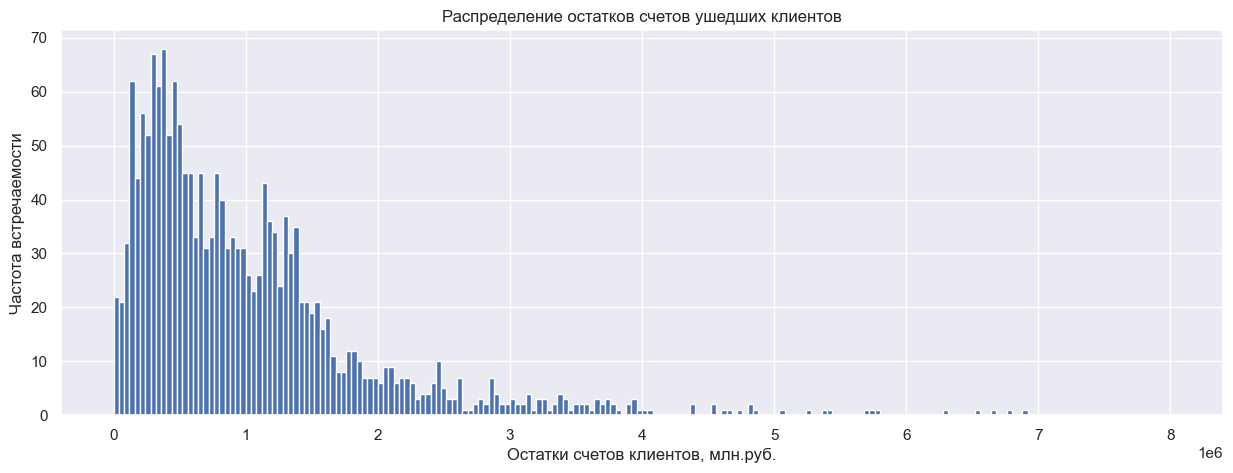

In [41]:
# Выведем характеристики распределения остатков счетов ушедших клиентов

balance_churn = data.query("churn == 1")['balance']
display(balance_churn.describe())
ax=balance_churn.hist(bins=200, grid=True, figsize=(15, 5), range=(0,8000000))
ax.set_xlabel('Остатки счетов клиентов, млн.руб.')
ax.set_ylabel('Частота встречаемости')
ax.set_title('Распределение остатков счетов ушедших клиентов')
plt.show()

count    8.155000e+03
mean     5.659595e+05
std      1.682128e+06
min      0.000000e+00
25%      1.273374e+05
50%      3.216426e+05
75%      6.650984e+05
max      1.191136e+08
Name: balance, dtype: float64

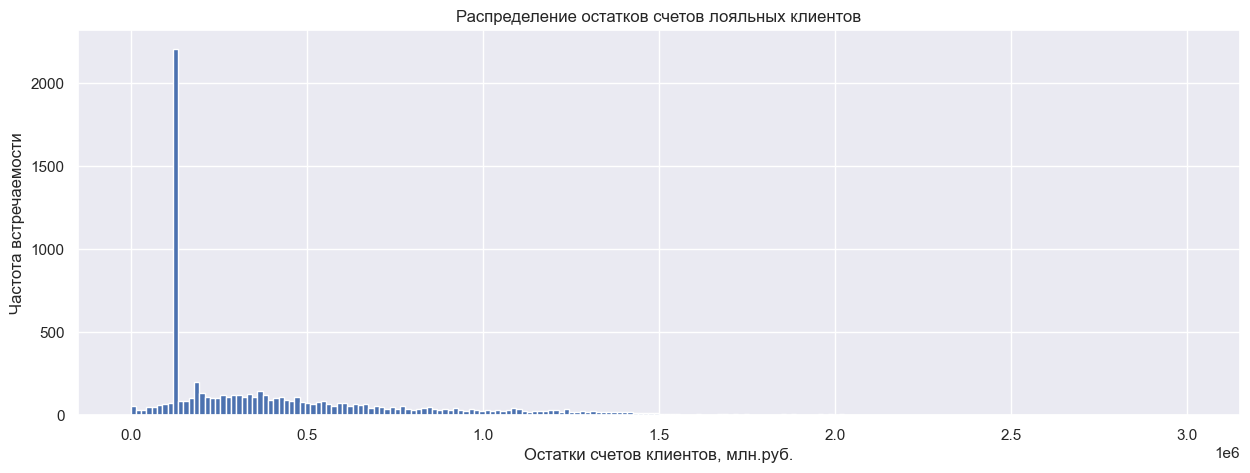

In [42]:
# Выведем характеристики распределения остатков счетов лояльных клиентов

balance_loyal = data.query("churn == 0")['balance']
display(balance_loyal.describe())
ax=balance_loyal.hist(bins=200, grid=True, figsize=(15, 5), range=(0,3000000))
ax.set_xlabel('Остатки счетов клиентов, млн.руб.')
ax.set_ylabel('Частота встречаемости')
ax.set_title('Распределение остатков счетов лояльных клиентов')
plt.show()

**Обоснование метода проверки гипотезы**

Выборки ушедших и лояльных клиентов составили 1818 и 8155.

Чтобы понять, можно ли применять t-тест, нужно проверить:
- Выборочные средние нормально распределены. Это условие не должно быть препятствием благодаря ЦПТ. Если размер выборки составляет хотя бы несколько десятков значений, то выборочные средние, которые можно получить из одной и той же генеральной совокупности, будут распределены близко к нормальному вокруг истинного среднего этой совокупности. В нашем случае условие выполняется.
- Дисперсии рассматриваемых генеральных совокупностей равны. В нашем случае нет оснований думать, что дисперсии генеральных совокупностей существенно различаются: отклонения выборок составили 2029 тыс.руб. и 1682 тыс.руб., различие 20%.

Для проверки гипотезы проведем двухвыборочный двухсторонний t-тест для независимых выборок. Сформулируем нулевую (Н0) и альтернативную (Н1) гипотезы:

- Н0 - средний остаток счета ушедших и лояльных клиентов равны
- Н1 - средний остаток счета ушедших и лояльных клиентов не равны

In [43]:
# проведем проверку гипотезы

#Уровень статистической значимости
alpha = 0.05

results = st.ttest_ind(
                       balance_churn, 
                       balance_loyal, 
                       alternative = 'two-sided')

print('p-value:', results.pvalue)

if(results.pvalue > alpha):
    print("Не отвергаем нулевую гипотезу") 
else:
    print("Отвергаем нулевую гипотезу")

print('Средний остаток счета ушедших клиентов:', round(balance_churn.mean(),0))
print('Средний остаток счета лояльных клиентов:', round(balance_loyal.mean(),0))

p-value: 6.225862595481932e-35
Отвергаем нулевую гипотезу
Средний остаток счета ушедших клиентов: 1127930.0
Средний остаток счета лояльных клиентов: 565960.0


По результату проведения t-теста p-value нулевой гипотезы намного ниже уровня ее статистической значимости, то есть она отвергается и тогда мы можем не отвергать гипотезу H1, что средний остаток счета ушедших и лояльных клиентов не равны, то есть разные.

## Выводы по результатам EDA, корреляционного анализа и гипотез, выделение признаков, влияющих на оттток.

- Рассмотрели средние значения признаков клиентов по группам оттока (есть отток "1" и нет "0"):
    - несущественно различаются по признакам score, age, est_salary;
    - больше в группе оттока по признакам:
        - equity (3.76 к 2.38),
        - balance (1128тыс.руб. к 566тыс.руб.),
        - products (2.38 к 1.76),
        - last_activity (0.70 к 0.48),
        - мужчины к женщинам (0.65 к 0.35)
        - Ярославль к Рыбинску и Ростову (0.61 к 0.24 и 0.15)
    - меньше в группе оттока по признакам:
        - credit_card (0.55 к 0.70)

- Рассмотрели распределения непрерывных признаков клиентов в разрезе оттока, выявили интервалы признаков, где отток выше, чем лояльность:
    - кредитный рейтинг (score): 825-900 баллов;
    - возраст (age): 25-35 и 50-60 лет;
    - счета клиентов (balance):
        - выявили выбросы данных за пределами 1,5 межквартильного размаха, высокая плотность выбросов в диапазоне 2-7 млн.руб. и отдельные выбросы в диапазоне 7-119 млн.руб. Распределение признака balance в разрезе оттока и лояльности рассмотрели в диапазоне наибольшей плотности данных от 0 до 5 млн.руб.
        - интервалы признака balance, где отток выше лояльности: 0.25-0.50, 0.75-1.0 и 1.5-4.0 млн.руб.
    - зарплаты клиентов (est_salary):
      - выявили выбросы данных за пределами 1,5 межквартильного размаха, высокая плотность выбросов в диапазоне 0.3-1.1 млн.руб., отдельные выбросы в диапазоне 1.1-1.4 млн.руб. Распределение признака est_salary в разрезе оттока и лояльности рассмотрели в диапазоне наибольшей плотности данных от 0 до 0.4 млн.руб.
      - интервалы признака est_salary, где отток выше лояльности: 100 - 215 тыс.руб.

- Рассмотрели распределения категориальных/дискретных признаков клиентов в разрезе оттока, выявили значения признаков более склонных к оттоку:
    - число объектов собственности (equity): 3 и выше
    - филиалы банка (city): в городах Ростов и Ярославль
    - пол клиентов (gender): мужчины;
    - число продуктов (products): от 3х и более;
    - наличие кредитной карты (credit_card): клиенты без кредитной карты;
    - статус активности (last_activity): активные клиенты более склонны к оттоку; вывод противоречит логике, возможно в данных ошибка кодирования и неактивные клиенты не попали в отток ошибочно; кодировку оттока по активности клиентов рекомендуется проверить.
    
Согласно матрице корреляции признаков, признак оттока имеет следующую корреляцию по признакам клиентов (коэффициенты Пирсона и уровень влияния по шкале Чеддока):
- кредитный рейтинг (score): 0.11 - очень слабая связь;
- счета клиентов (balance): 0.12 - очень слабая связь;
- наличие кредитной карты (credit_card): -0.13 - очень слабая связь (по отсутствию карты);
- пол клиентов (gender): 0.14 - очень слабая связь;
- число объектов собственности (equity): 0.27 - очень слабая/слабая связь;
- число продуктов (products): 0.3 - слабая связь;

Согласно расчету мер центральной тенденции, для признака оттока есть изменения мер центральной тенденции (в % изменения мер):
- кредитный рейтинг (score): 2%;
- счета клиентов (balance): 50%;
- число объектов собственности (equity): 25%.

Согласно проведенной проверке статистических гипотез, вероятнее, что:
- средний доход ушедших и лояльных клиентов равны - то есть отток менее связан в доходом клиентов
- средний остаток счета ушедших и лояльных клиентов не равны - отток более связан с остатками на счетах

С учетом полученных результатов **рекомендуется выбрать следующие признаки, влияющие на отток клиентов**:
- число продуктов (products): от 3х и более
- число объектов собственности (equity): 3 и более
- мужчины всех возрастов 
- клиенты возрастов 25-35 и 50-60 лет
- клиенты без кредитной карты
- остатки на счетах 0.25-0.50, 0.75-1.0 и 1.5-4.0 млн.руб.
- кредитный рейтинг (score): 825-900 баллов.
- клиенты из Ярославля

## Сегментация клиентов по признакам оттока

### Проранжируем выделенные признаки оттока

In [44]:
display('Средний отток для отобранных признаков оттока')
display('Число продуктов (products): от 3х и более:', round(data.query("products >= 3")['churn'].mean(),4))
display('Число объектов собственности (equity): 3 и более:', round(data.query("equity >= 3")['churn'].mean(),4))
display('Мужчины:', round(data.query("gender == 'М'")['churn'].mean(),4))
display('Клиенты 25-30 лет:', round(data.query("25 <= age <=30")['churn'].mean(),4))
display('Клиенты 50-60 лет:', round(data.query("age >=50 and age <=60")['churn'].mean(),4))
display('Клиенты без кредитной карты:', round(data.query("credit_card == 0")['churn'].mean(),4))
display('Остатки на счетах 250-500 тыс.руб.:', round(data.query("balance >=250000 and balance <=500000")['churn'].mean(),4))
display('Остатки на счетах 750-1000 тыс.руб.:', round(data.query("balance >=750000 and balance <=1000000")['churn'].mean(),4))
display('Остатки на счетах 1500-4000 тыс.руб.:', round(data.query("balance >=1500000 and balance <=4000000")['churn'].mean(),4))
display('Кредитный рейтинг 825-900 баллов:', round(data.query("score >=825 and score <=900")['churn'].mean(),4))
display('Клиенты из Ярославля:', round(data.query("city == 'Ярославль'")['churn'].mean(),4))

'Средний отток для отобранных признаков оттока'

'Число продуктов (products): от 3х и более:'

0.3952

'Число объектов собственности (equity): 3 и более:'

0.2636

'Мужчины:'

0.237

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1444\2835240344.py:5: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  display('Клиенты 25-30 лет:', round(data.query("25 <= age <=30")['churn'].mean(),4))


'Клиенты 25-30 лет:'

0.2409

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1444\2835240344.py:6: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  display('Клиенты 50-60 лет:', round(data.query("age >=50 and age <=60")['churn'].mean(),4))


'Клиенты 50-60 лет:'

0.2647

'Клиенты без кредитной карты:'

0.2556

'Остатки на счетах 250-500 тыс.руб.:'

0.1722

'Остатки на счетах 750-1000 тыс.руб.:'

0.2648

'Остатки на счетах 1500-4000 тыс.руб.:'

0.5296

'Кредитный рейтинг 825-900 баллов:'

0.2499

'Клиенты из Ярославля:'

0.1901

Рейтинг выбранных признаков оттока в порядке убывания влияния:
- Остатки на счетах 1500-4000 тыс.руб.: 0.5296
- Число продуктов (products): от 3х и более: 0.3952
- Остатки на счетах 750-1000 тыс.руб.: 0.2648
- Клиенты 50-60 лет: 0.2647
- Число объектов собственности (equity): 3 и более: 0.2636
- Клиенты без кредитной карты: 0.2556
- Кредитный рейтинг 825-900 баллов: 0.2499
- Клиенты 25-30 лет: 0.2409
- Мужчины: 0.237
- Клиенты из Ярославля: 0.1901
- Остатки на счетах 250-500 тыс.руб.: 0.1722

### Сформируем сегменты на основе выделенных признаков и величины оттока в них

- Выделенные признаки проранжированы по размеру оттока, определены их интервалы, включающие наибольший процент оттока клиентов.


- Сформируем три сегмента сочетанием признаков оттока (2-3 признака), имеющих наибольшее влияние на отток. Вместе с тем каждый формируемый сегмент должен включать не менее 500 клиентов. 


- **Группируя признаки, сформированы предлагаемые три сегмента:**
    1. Мужчины с числом продуктов (products) 3 и более.
    2. Клиенты возраста 50-60 лет с числом объектов собственности (equity) 3 и более.
    3. Клиенты возраста 25-30 лет с кредитным рейтингом (score) 825-900.
    
- Для каждого сегмента определим количество клиентов в сегменте, количество отточных клиентов в сегменте и уровень оттока в сегменте.

In [45]:
# сегмент "Мужчины с числом продуктов 3 и более"

display('Сегмент 1: Мужчины с числом продуктов 3 и более')
segment_1 = "products >=3 and gender == 'М'"

print('Количество клиентов сегмента:', data.query(segment_1)['user_id'].count())
print('Количество ушедших клиентов сегмента:', data.query(segment_1)['churn'].sum())
print('Средний уровень оттока в сегменте:', round(data.query(segment_1)['churn'].mean(),4))

'Сегмент 1: Мужчины с числом продуктов 3 и более'

Количество клиентов сегмента: 752
Количество ушедших клиентов сегмента: 376
Средний уровень оттока в сегменте: 0.5


In [47]:
# Сегмент "Клиенты возраста 50-60 лет с числом объектов собственности 3 и более."
display('Сегмент 2: Клиенты возраста 50-60 лет с числом объектов собственности 3 и более.')
segment_2 = "equity >=3 and age >=50  and age <=60"
#pd.eval(segment_2, engine='python')
print('Количество клиентов сегмента:', data.query(segment_2)['user_id'].count())
print('Количество ушедших клиентов сегмента:', data.query(segment_2)['churn'].sum())
print('Средний уровень оттока в сегменте:', round(data.query(segment_2)['churn'].mean(),4))

'Сегмент 2: Клиенты возраста 50-60 лет с числом объектов собственности 3 и более.'

Количество клиентов сегмента: 1032
Количество ушедших клиентов сегмента: 369
Средний уровень оттока в сегменте: 0.3576


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1444\1677150957.py:5: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  print('Количество клиентов сегмента:', data.query(segment_2)['user_id'].count())
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1444\1677150957.py:6: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  print('Количество ушедших клиентов сегмента:', data.query(segment_2)['churn'].sum())
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1444\1677150957.py:7: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  print('Средний уровень оттока в сегменте:', round(data.query(segment_2)['churn'].mean(),4))


In [48]:
# Сегмент "Клиенты возраста 25-30 лет с кредитным рейтингом 825-900."

display('Сегмент 3: Клиенты возраста 25-30 лет с кредитным рейтингом 825-900.')
segment_3 = 'score >= 825 and score <= 900 and age >=25 and age <=30'
print('Количество клиентов сегмента:', data.query(segment_3)['user_id'].count())
print('Количество ушедших клиентов сегмента:', data.query(segment_3)['churn'].sum())
print('Средний уровень оттока в сегменте:', round(data.query(segment_3)['churn'].mean(),4))

'Сегмент 3: Клиенты возраста 25-30 лет с кредитным рейтингом 825-900.'

Количество клиентов сегмента: 516
Количество ушедших клиентов сегмента: 174
Средний уровень оттока в сегменте: 0.3372


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1444\4016716828.py:5: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  print('Количество клиентов сегмента:', data.query(segment_3)['user_id'].count())
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1444\4016716828.py:6: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  print('Количество ушедших клиентов сегмента:', data.query(segment_3)['churn'].sum())
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1444\4016716828.py:7: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  print('Средний уровень оттока в сегменте:', round(data.query(segment_3)['churn'].mean(),4))


## Приоритизация сегментов 

Проранжируем выделенные сегменты по приоритетности выделения ресурсов отдела маркетинга исходя из уровня оттока в сегментах и количества ушедших клиентов. Согласно указанной логике рейтинг сегментов в порядке приоритетности работы с ними выглядит следующим образом:
1. Сегмент 1: Мужчины с числом продуктов 3 и более. 
2. Сегмент 2: Клиенты возраста 50-60 лет с числом объектов собственности 3 и более.
3. Сегмент 3: Клиенты возраста 25-30 лет с кредитным рейтингом 825-900.

## Выводы и базовые рекомендации по работе с клиентами

- В результате выполнения проекта выделено 11 признаков с интервалами значений, наиболее сильно влияющих на отток клиентов. 

- Полученные признаки с отобранными интервалами значений проранжированы в порядке убывания величины влияния на отток клиентов.

- Анализ полученного рейтинга признаков с интервалами значений позволил сформировать три сегмента признаков оттока. 

- Сегменты сформированы сочетанием признаков оттока (2-3 признака), имеющих наибольшее влияние на отток. Вместе с тем каждый сформированный сегмент должен включать не менее 500 клиентов, что также было соблюдено в сегментах. 


- Средний отток клиентов по банку составляет 0,182.

- Группируя отобранные признаки, предлагается сформировать три сегмента, наиболее влияющих на отток:
    1. Мужчины с числом продуктов 3 и более - это 752 клиента, отток 0,5 (больше на 175%, чем по банку).
    2. Клиенты возраста 50-60 лет с числом объектов собственности (equity) 3 и более - 1032 клиента, отток 0,358 (больше на 97%, чем по банку).
    3. Клиенты возраста 25-30 лет с кредитным рейтингом (score) 825-900 - 516 клиентов, отток 0,334 (больше на 84%, чем по банку).


- Исходя из наполнение сегментов и признаков, которые легли в их основу, **предлагаются следующие рекомендации по работе с клиентами для снижения оттока:**
    
    **Мужчины с числом продуктов 3 и более:**
        
    Клиентское проникновение в продукт является основной метрикой лояльности клиентов банка, при высокой величине оттока для таких клиентов банк не покрывает базовые потребности в продуктах (расчеты, кредиты, депозиты, карты, валютные продукты и т.п.) и клиенты уходят; банк может не знать о базовых потребностях или условия по продуктам для клиентов не привлекательные; с учетом этого рекомендуется:
            - провести опрос среди клиентов мужчин по уровню удовлетворенности (NPS), базовым потребностям в продуктах;
            - пересмотреть (обновить) условия по продуктам, с учетом условий банков конкурентов, опубликовать обновленные условия, сделать рассылку обновленных условий клиентам мужчинам;
            - сделать прототипы новых продуктов исходя полученных результатов опросов, сформировать предложения по ним,  в т.ч. с помощью AI инструментов; 
            - предложить продукты страхования по привлекательным тарифам - ОСАГО, путешествия, имущество и др.
            
    **Клиенты возраста 50-60 лет с числом объектов собственности 3 и более:**
        
    Клиенты этого сегмента являются как правило арендодателями своих объектов собственности, получают доход и имеют потребности его размещения; также для них важно проводить платежи по содержанию объектов с минимальными расходами. С учетом этого рекомендуется сформировать и разослать клиентам сегмента следующие предложения:
             - предложить условия расчетов по квартплате для таких клиентов без комиссий;
             - предложить накопительные счета с ежедневным пополнением, снятием, начислением процентов на остаток.
        
    **Клиенты возраста 25-30 лет с кредитным рейтингом (score) 825-900.**
     
     Клиенты этого сегмента как правило люди с активной жизненной позицией, ищут возможности вложения средств и получения дохода. Для этого сегмента рекомендуется сформировать и разослать клиентам сегмента следующие предложения: 
             - накопительные счета с гибким обслуживанием (пополнение, снятие)
             - карты с кэшбеком по направленим расходов (возможность выбора - например, рестораны, магазины, путешествия)
             - страховки путешественников
             - ипотеки с конкурентными ставками, в т.ч. снижение ставок для зарплатных клиентов
             - брокерские счета для инвестирования и заработка как пассивного дохода
             - реферальные премии за привлечение клиентов в банк.